우리는 선형회귀의 한계를 체험해보았다.
이번에는 조금 더 아래로 휜 곡선을 가지고 회귀를 해 보자.


In [2]:
#이차방정식을 찾을 것이므로, 우리는 길이의 제곱에 대한 값이 필요하다.
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [4]:
#특성을 2차원 배열로 만들어준다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [5]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [6]:
#다시 선형회귀를 이용? 그냥 y = ax1 + bx2 + c의 계수들을 구해주는건가보네
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [8]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


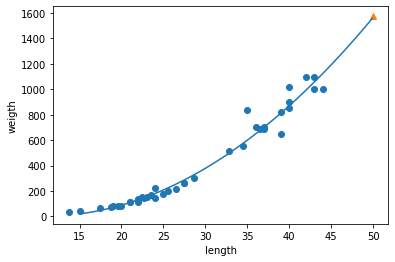

In [10]:
import matplotlib.pyplot as plt

point = np.arange(15, 50, 0.1)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 -21.55 * point + 116.05)

plt.scatter(50, 1573.98, marker='^')
plt.xlabel('length')
plt.ylabel('weigth')

plt.show()

In [12]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

#여전히 테스트의 점수가 조금 더 높다. 과소적합이 조금 남아있는 것 같으니 더 복잡한 모델이 필요할 것 같다.

0.9706807451768623
0.9775935108325122
